In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset-csv/emails.csv
/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv
/kaggle/input/mailmail/mail_data.csv


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score

**Exploring different datasets and their features in order to select the dataset that will yield a high accuracy rate.**

In [9]:
mailmail = pd.read_csv('/kaggle/input/mailmail/mail_data.csv')
mailmail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mailmail.shape

(5572, 2)

In [11]:
mailmail.size

11144

In [12]:
mailmail.columns

Index(['Category', 'Message'], dtype='object')

In [13]:
shdataset = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')
shdataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
emails=pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

In [15]:
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [21]:
col=(list(emails.columns))
col[:10]

['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou']

In [17]:
emails.shape

(5172, 3002)

In [18]:
ar1=np.array(emails[100:200])
for i in ar1:
    print(i[3001],end=" ")

0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 

In [19]:
arr=np.array(mailmail[0:5])
arr[2]

array(['spam',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
      dtype=object)

**From these datasets, I've decided to use 'emails' dataset. which contains keywords and lot of key insights about the mail. After all, suffeciently large dataset in hand**

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [23]:
data = emails
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


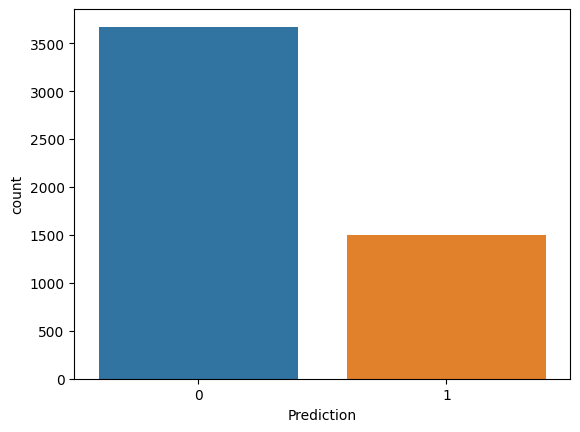

In [26]:
sns.countplot(data=data,x="Prediction")
plt.show()

In [27]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [29]:
data.values

array([['Email 1', 0, 0, ..., 0, 0, 0],
       ['Email 2', 8, 13, ..., 1, 0, 0],
       ['Email 3', 0, 0, ..., 0, 0, 0],
       ...,
       ['Email 5170', 0, 0, ..., 0, 0, 1],
       ['Email 5171', 2, 7, ..., 1, 0, 1],
       ['Email 5172', 22, 24, ..., 0, 0, 0]], dtype=object)

In [30]:
data = data.iloc[:,1:]
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [31]:
X=data.iloc[:,:3000]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [32]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

splitting data

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=8)

In [46]:
def performance(y_prediction):
    print("Precision: ",precision_score(y_test,y_prediction))
    print("recall: ",recall_score(y_test,y_prediction))
    print("Accuracy: ",accuracy_score(y_test,y_prediction))
    print("F1Score: ",f1_score(y_test,y_prediction))
    print(confusion_matrix(y_test,y_prediction))
    confusion_m=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_prediction))
    confusion_m.plot()

**Using Logistic Regression**

In [43]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precision:  0.9536082474226805
recall:  0.9462915601023018
Accuracy:  0.9698375870069605
F1Score:  0.9499358151476252
[[884  18]
 [ 21 370]]


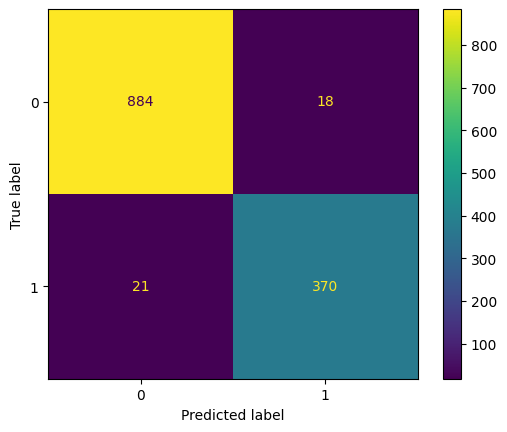

In [47]:
y_prediction = LR.predict(X_test)
performance(y_prediction)

In [48]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       902
           1       0.95      0.95      0.95       391

    accuracy                           0.97      1293
   macro avg       0.97      0.96      0.96      1293
weighted avg       0.97      0.97      0.97      1293



**using model XGBClassifier**

In [49]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Precision:  0.9501246882793017
recall:  0.9744245524296675
Accuracy:  0.9767981438515081
F1Score:  0.9621212121212122
[[882  20]
 [ 10 381]]


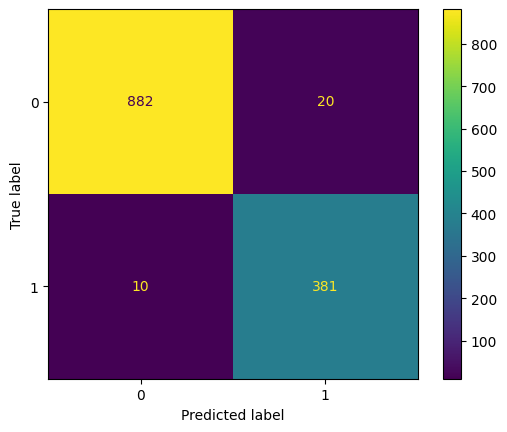

In [51]:
y_prediction_xgb = xgb.predict(X_test)
performance(y_prediction_xgb)

In [52]:
print(classification_report(y_test,y_prediction_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       902
           1       0.95      0.97      0.96       391

    accuracy                           0.98      1293
   macro avg       0.97      0.98      0.97      1293
weighted avg       0.98      0.98      0.98      1293



**using Software vector machine - SVC**

In [54]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

Precision:  0.8987341772151899
recall:  0.3631713554987212
Accuracy:  0.7950502706883217
F1Score:  0.517304189435337
[[886  16]
 [249 142]]


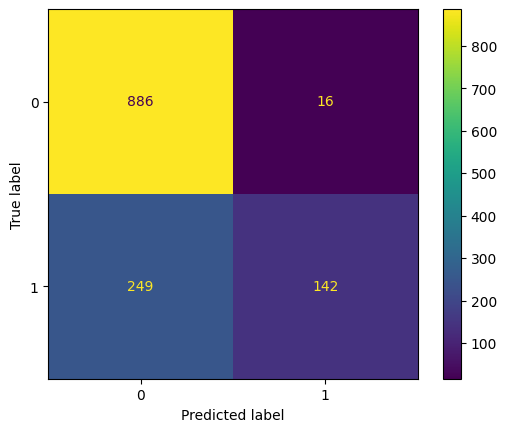

In [56]:
y_prediction_svc=svc.predict(X_test)
performance(y_prediction_svc)

In [57]:
print(classification_report(y_test,y_prediction_svc))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       902
           1       0.90      0.36      0.52       391

    accuracy                           0.80      1293
   macro avg       0.84      0.67      0.69      1293
weighted avg       0.82      0.80      0.76      1293



**using randomforestclassification algorithm**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=6,n_estimators=100,oob_score=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_jobs=-1, oob_score=True, random_state=42)

In [62]:
y_prediction_rfc=rfc.predict(X_test)

Precision:  0.9818181818181818
recall:  0.5524296675191815
Accuracy:  0.8615622583139985
F1Score:  0.707037643207856
[[898   4]
 [175 216]]


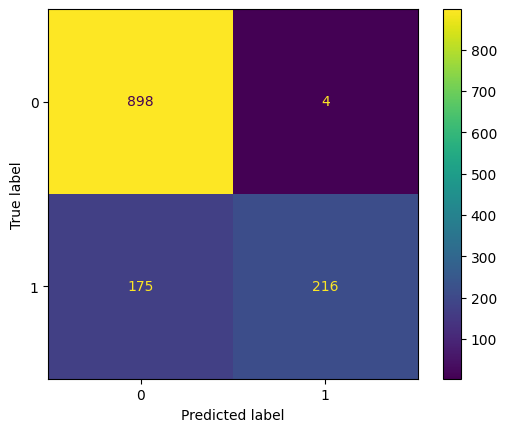

In [63]:
performance(y_prediction_rfc)

In [65]:
print(classification_report(y_test,y_prediction_rfc))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       902
           1       0.98      0.55      0.71       391

    accuracy                           0.86      1293
   macro avg       0.91      0.77      0.81      1293
weighted avg       0.88      0.86      0.85      1293



By applying different classification algorithm help us to figure out which algorithm can give high accuracy. The dataset may be same; but the wonderful thing is different algorithm treat the same dataset in different way. Even we can go with deep learning. 

**We have to convert the mail into csv of tokens then we can predict the output**